## UseLIb

In [34]:
import  numpy as np
import  pandas as pd
import  matplotlib.pyplot as plt
import os
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothicCoding'


## 경로설정

In [35]:
pwd

'/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data'

In [4]:
os.chdir('G:\내 드라이브\제주_전기차\data')

## Use Data

In [5]:
# df = pd.read_csv('광고거른거.csv') 
df = pd.read_csv('~/WorkSpace/GoogleDrive/제주_전기차/data/광고거른거.csv')# 리눅스
# df_keyword = pd.read_csv('인스타전기차.csv')
# df_news = pd.read_csv('CFI전기차보도자료.csv')

In [11]:
df.head(2)

,제목,내용,유형,조회수,작성날짜,월별,카페명,년별,평가,내용거른거
0,봉고3더블캡,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...


### 데이터 수집기간

In [107]:
df.월별.unique()

array([2022.03, 2022.02, 2022.01, 2021.12, 2021.11, 2021.1 , 2021.09,
       2021.08, 2021.07, 2021.06, 2021.05, 2021.04, 2021.03, 2021.02,
       2021.01, 2020.12, 2020.11, 2020.1 , 2020.09, 2020.08, 2020.07,
       2020.06, 2020.05, 2020.04, 2020.03, 2020.02, 2020.01, 2019.12,
       2019.11, 2019.1 , 2019.09, 2019.08, 2019.07, 2019.06, 2019.05,
       2019.04, 2019.03, 2019.02, 2019.01, 2018.12, 2018.11, 2018.1 ,
       2018.09, 2018.08, 2018.07, 2018.06, 2018.05, 2018.04, 2018.03,
       2018.02, 2018.01, 2017.12, 2017.11, 2017.1 , 2017.09, 2017.08,
       2017.07, 2017.06, 2017.05, 2017.04, 2017.03, 2017.02, 2017.01,
       2016.11, 2016.1 , 2016.09, 2016.08, 2016.07, 2016.05, 2016.04,
       2016.03, 2016.02, 2016.01, 2015.03, 2014.11, 2014.09, 2014.08,
       2014.07, 2014.03, 2012.07, 2011.06, 2010.11, 2010.06, 2016.12,
       2015.12, 2015.11, 2015.1 , 2015.09, 2015.08, 2015.07, 2015.06,
       2015.05, 2015.04, 2014.1 , 2014.06, 2014.04, 2015.01, 2016.06])

## 전기차종별 분석

In [233]:
# del df['내용']

In [234]:
df.head(1)

,제목,유형,조회수,작성날짜,월별,카페명,년별,평가,내용거른거
0,봉고3더블캡,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...


In [235]:
df.rename(columns={'내용거른거':'내용'},inplace=True)

In [236]:
df  = df.dropna()

In [238]:
df.reset_index(drop=True,inplace=True)

In [239]:
df.카페명.value_counts()

전기차동호회(투플럭스)    375088
네이버블로그            8460
전기차동호회            4390
느영나영              3850
제사모               1182
Name: 카페명, dtype: int64

In [6]:
df_jeju = df[df.카페명 != '전기차동호회(투플럭스)']

In [241]:
df_jeju.reset_index(drop=True,inplace=True)

<AxesSubplot:xlabel='년별,평가'>

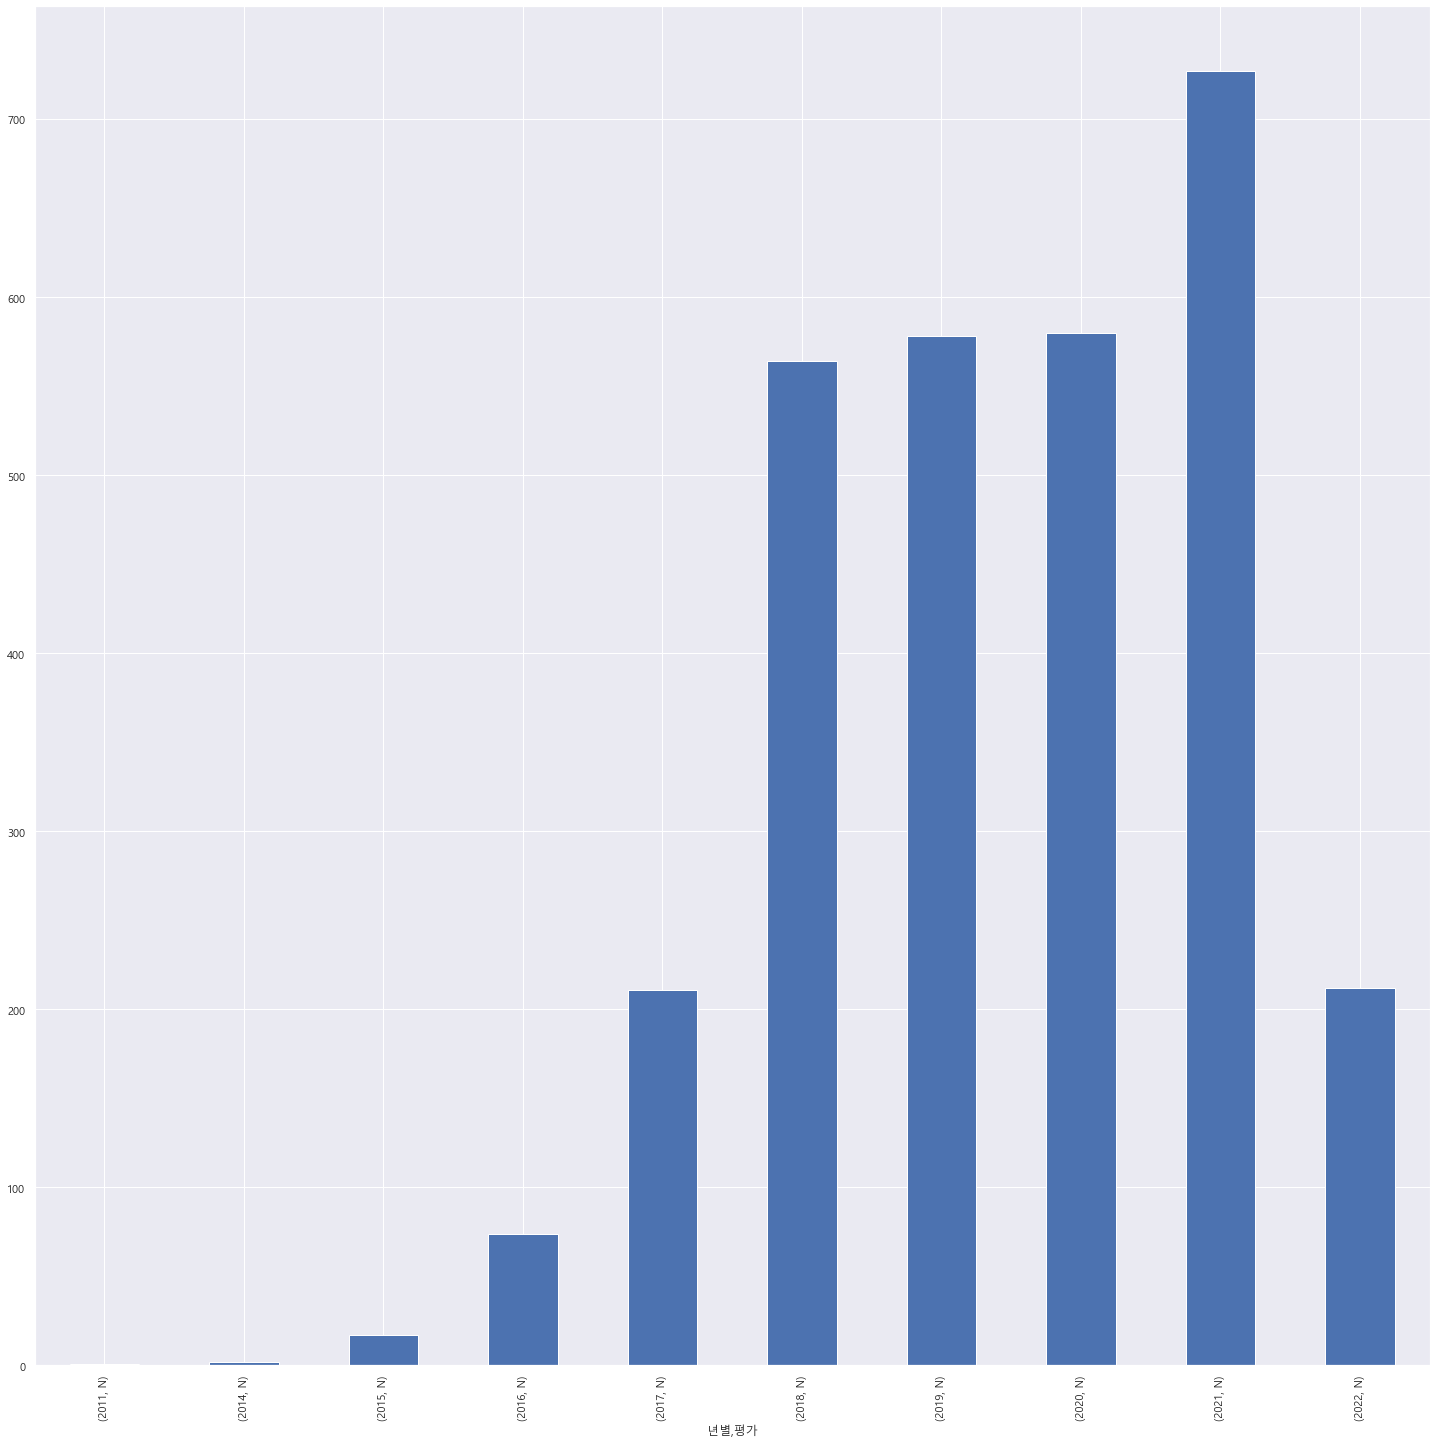

In [242]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가[df_jeju.평가=='N']]).평가.count().plot.bar()

<AxesSubplot:xlabel='년별,평가'>

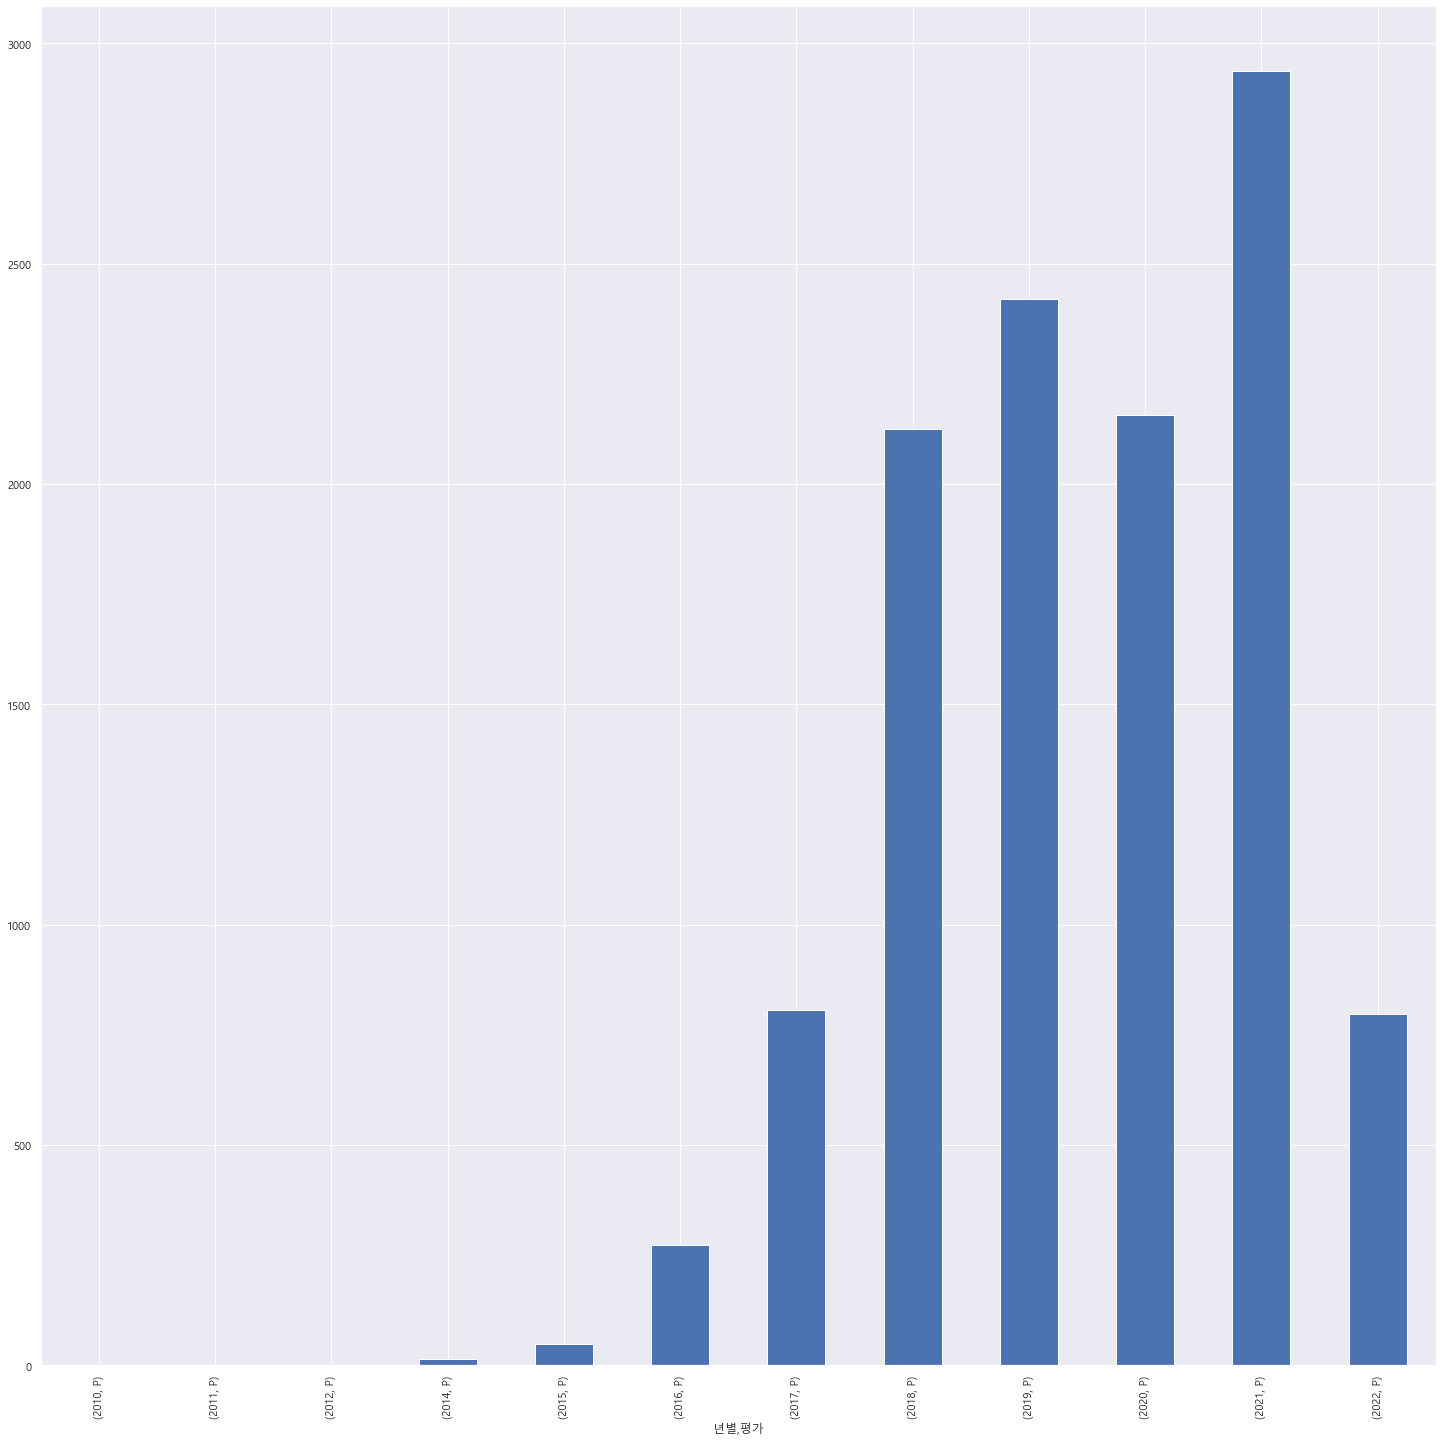

In [243]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가[df_jeju.평가=='P']]).평가.count().plot.bar()

<AxesSubplot:xlabel='년별,평가'>

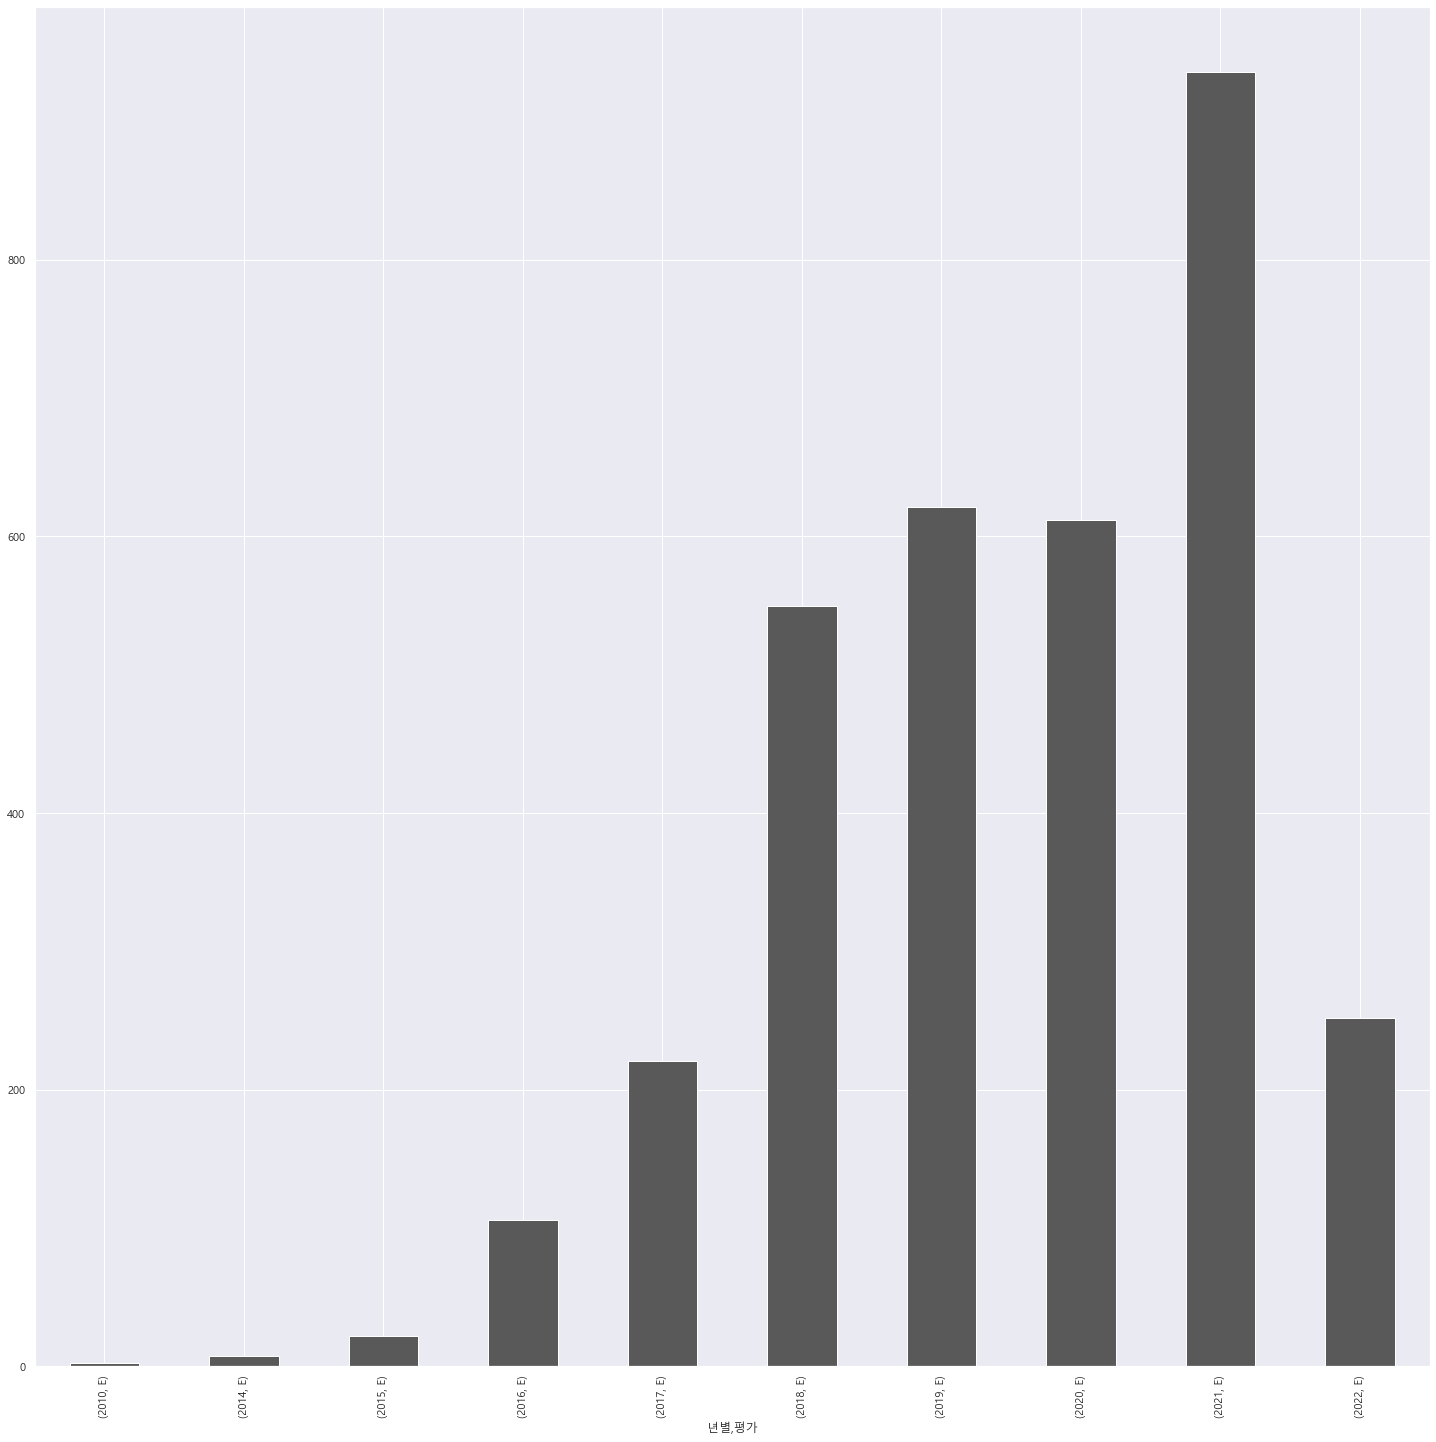

In [73]:
df_jeju.groupby([df_jeju.년별,df_jeju.평가[df_jeju.평가=='E']]).평가.count().plot.bar(color='#595959')

In [88]:
type(df.년별[0])

numpy.int64

In [91]:
df_jeju.년별.value_counts()

2021    4600
2019    3620
2020    3348
2018    3240
2022    1262
2017    1238
2016     454
2015      88
2014      24
2010       4
2012       2
2011       2
Name: 년별, dtype: int64

In [ ]:
df_jeju.내용 in [2022]

In [32]:
# sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
# sns.displot(data=df_jeju, x="년별",hue='평가',)

In [ ]:
sns.set(rc = {'figure.figsize':(25,25)})
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.displot(data=df[df.시간대 != '미분류'], x="시간대",col='골프장지역명',hue='시간대')

In [68]:
df.카페명.value_counts()

전기차동호회(투플럭스)    375088
네이버블로그            8460
전기차동호회            4390
느영나영              3850
제사모               1182
Name: 카페명, dtype: int64

In [71]:
df[df.카페명=='네이버블로그'].to_csv('네이버블로그평가')

0          보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요   거래 지역...
1         육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...
3         안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...
5         월일일 딸명과 엄마까지 총 인 제주여행을 계획중입니다비행기 예약은 끝났고 렌트카를 ...
6         차량 정보  차량번호   차량 번호 참고 연식   주행거리  만킬로 연료  전기 변...
                                ...                        
414153     취소 차 잡다 카 마스터 님 계시다 요 계시다 요 아이오 닉 두다 좋다 지역 울릉 이다
414154    대기 순번 문의 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다 네 ...
414156    니 로 회생제동 질문 안녕하다 니 로 중고 로 타고 있다 네비업뎃 하고 나서다 부터...
414157    가입 인사 드리다 자기 소개 안녕하다 기다리다 있다 지역 고양시 한글 별명 뜻 이름...
414158    취소 차 문의 드리다 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다...
Name: 내용, Length: 392970, dtype: object

In [56]:
df['년별']= df.년별.apply(lambda x : 2015 if x < 2016 else x)

In [57]:

df_jeju['년별']= df_jeju.년별.apply(lambda x : 2015 if x < 2016 else x)


/tmp/ipykernel_144807/3083104754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeju['년별']= df_jeju.년별.apply(lambda x : 2015 if x < 2016 else x)


In [138]:
# df_jeju['년별']= df_jeju.년별.apply(lambda x : int(x[:4]))

C:\Users\alsdn\AppData\Local\Temp/ipykernel_20576/813171590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeju['년별']= df_jeju.년별.apply(lambda x : int(x[:4]))


In [140]:
df_jeju.년별.value_counts()

2021    4600
2019    3620
2020    3348
2018    3240
2022    1262
2017    1238
2016     574
Name: 년별, dtype: int64

In [248]:
df.head(2)

,제목,유형,조회수,작성날짜,월별,카페명,년별,평가,내용
0,봉고3더블캡,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...


In [249]:
[df_jeju.조회수 != '조회수없음']

[0         True
 1         True
 2         True
 3         True
 4         True
          ...  
 17877    False
 17878    False
 17879    False
 17880    False
 17881    False
 Name: 조회수, Length: 17882, dtype: bool]

<AxesSubplot:>

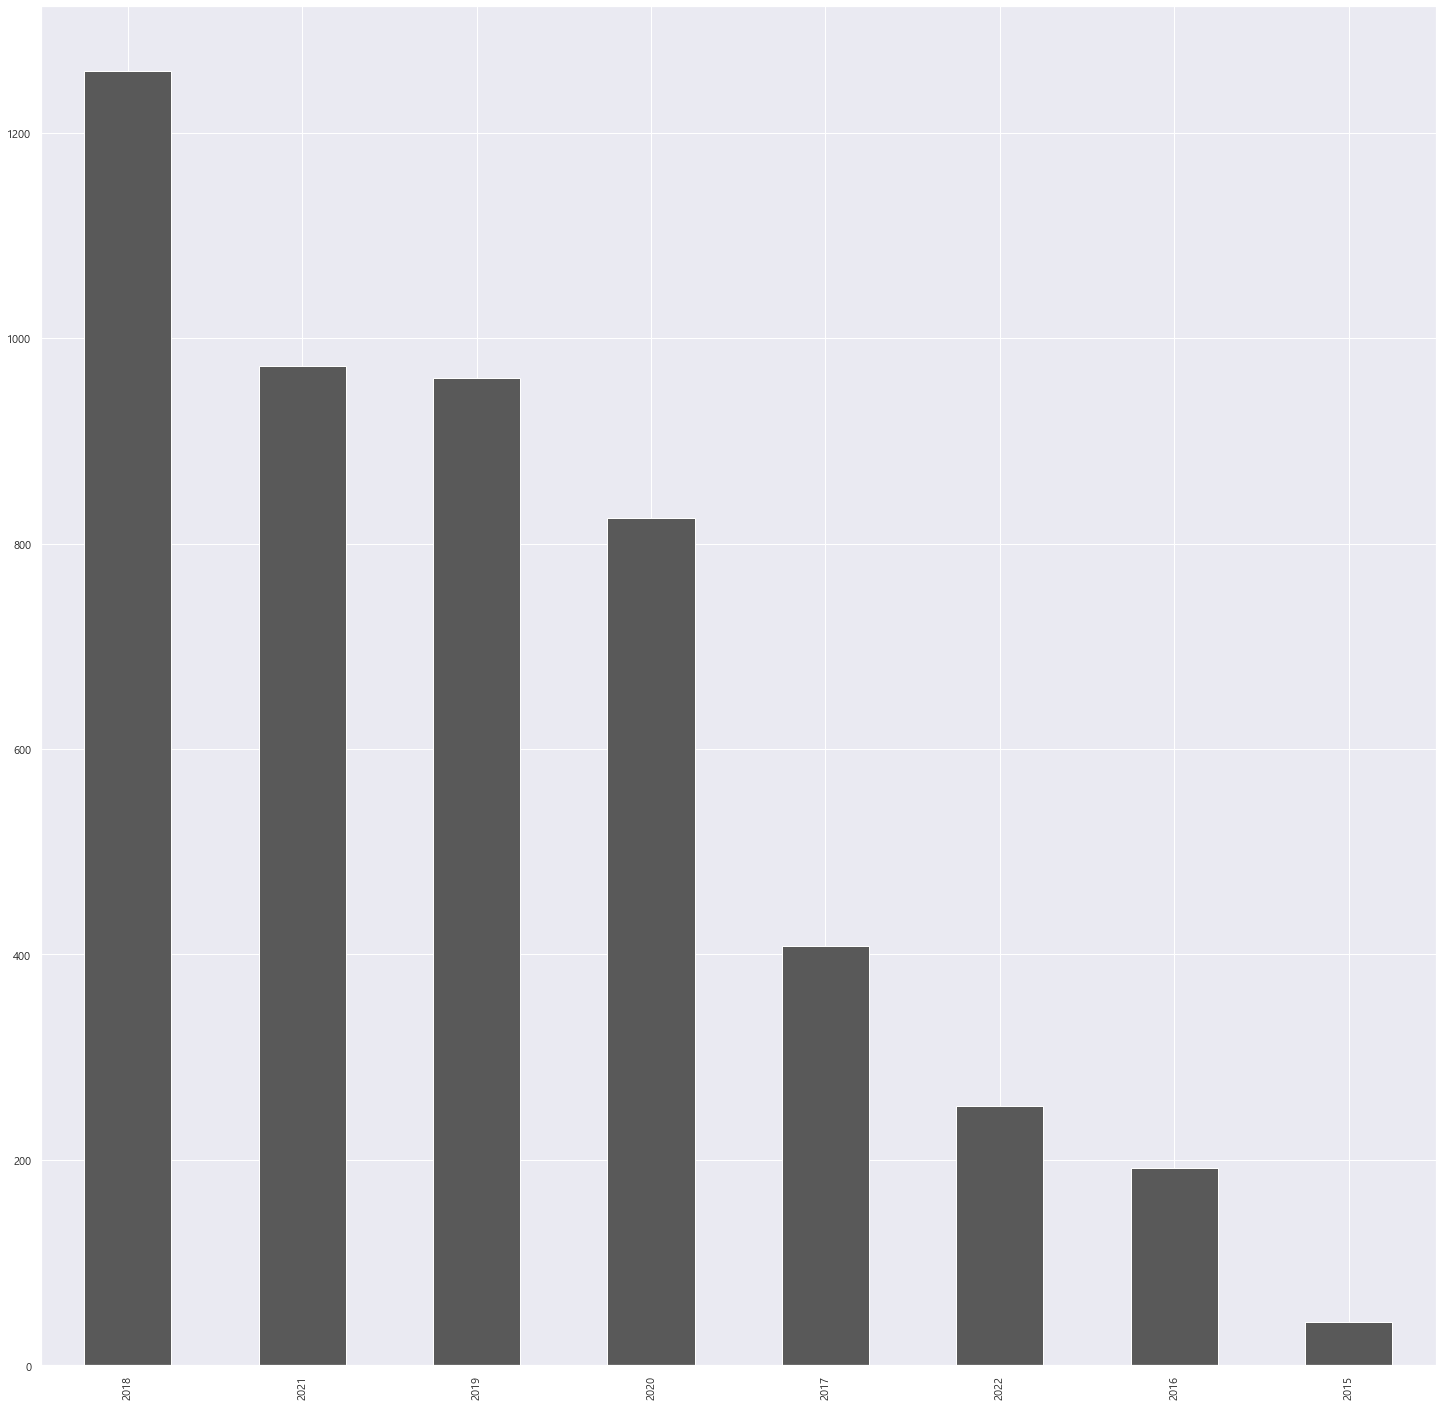

In [250]:
df_jeju[df_jeju.조회수 != '조회수없음'].년별.value_counts().plot.bar(color='#595959')

In [ ]:
df_news

<AxesSubplot:xlabel='년별'>

<Figure size 1080x720 with 0 Axes>

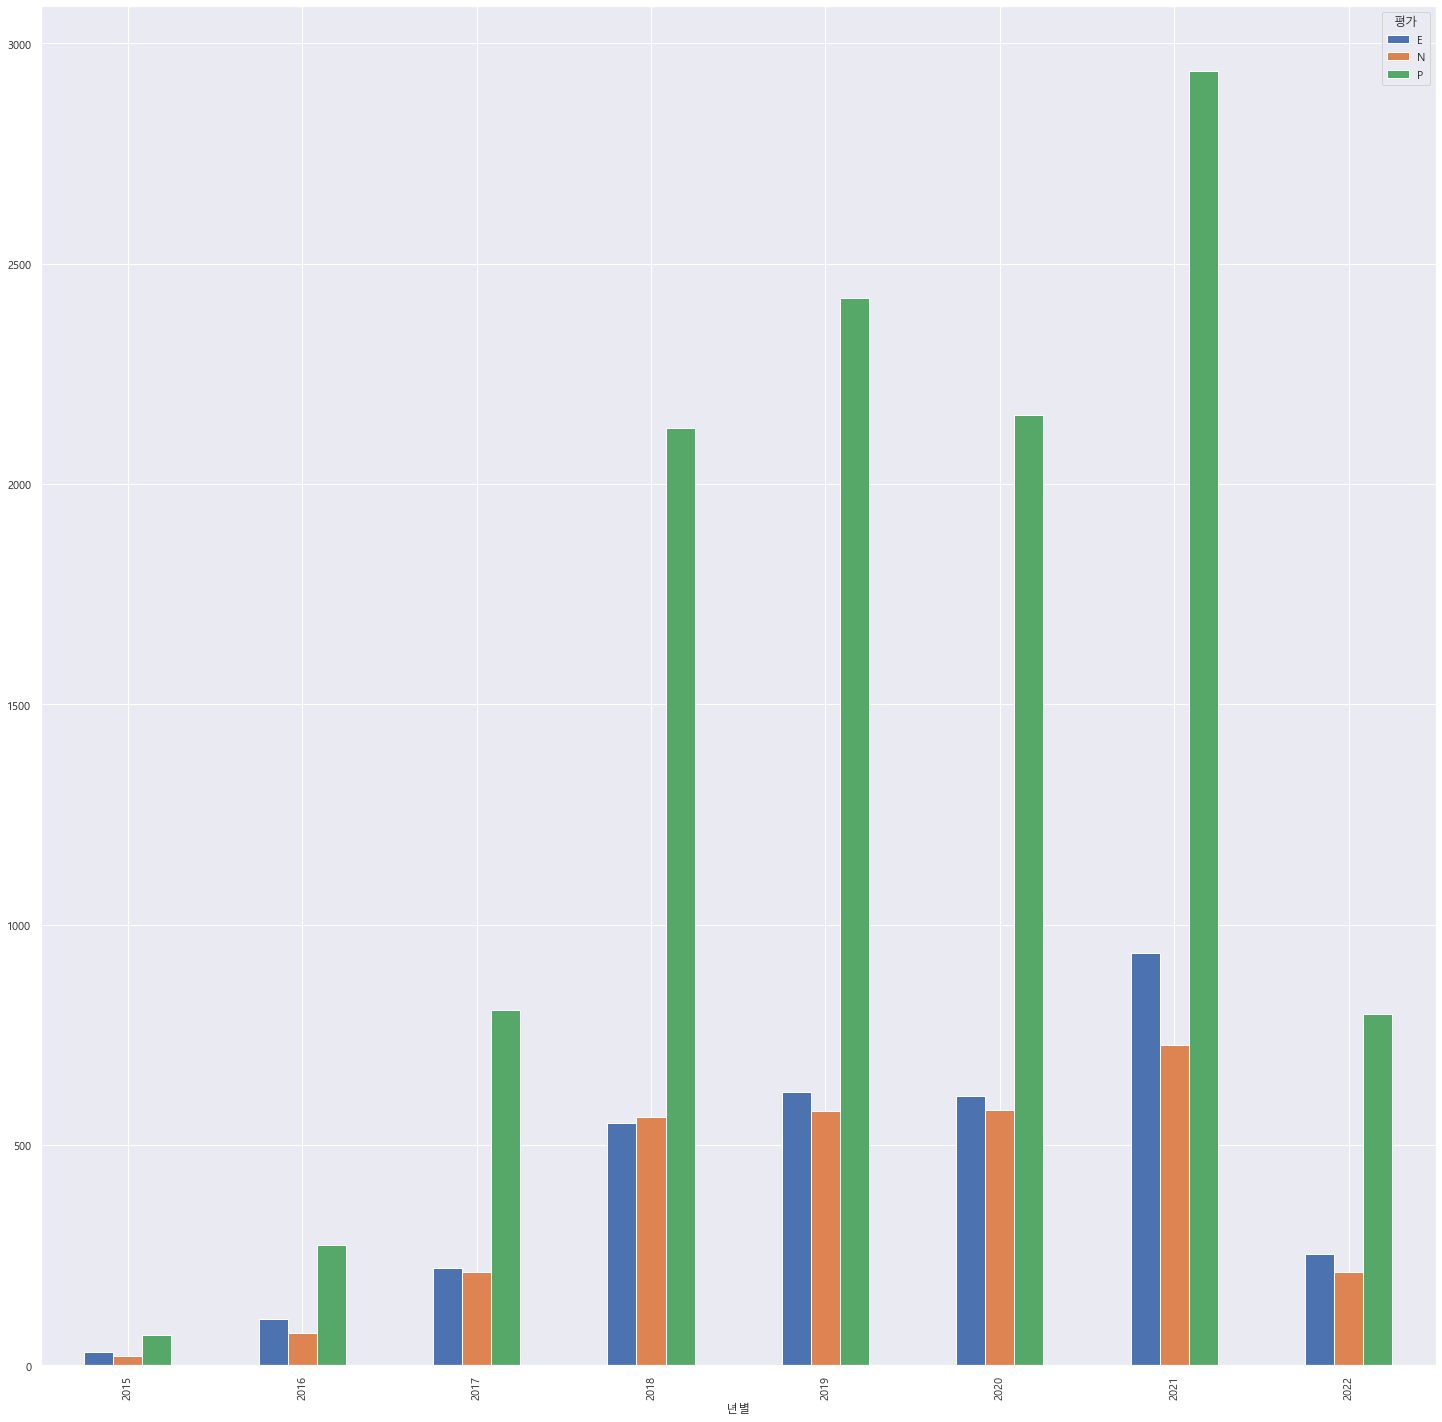

In [251]:
plt.figure(figsize=(15,10))
df_jeju.groupby([df_jeju.년별,df_jeju.평가]).제목.count().unstack().plot.bar()

## 전기차뉴스

<AxesSubplot:xlabel='년'>

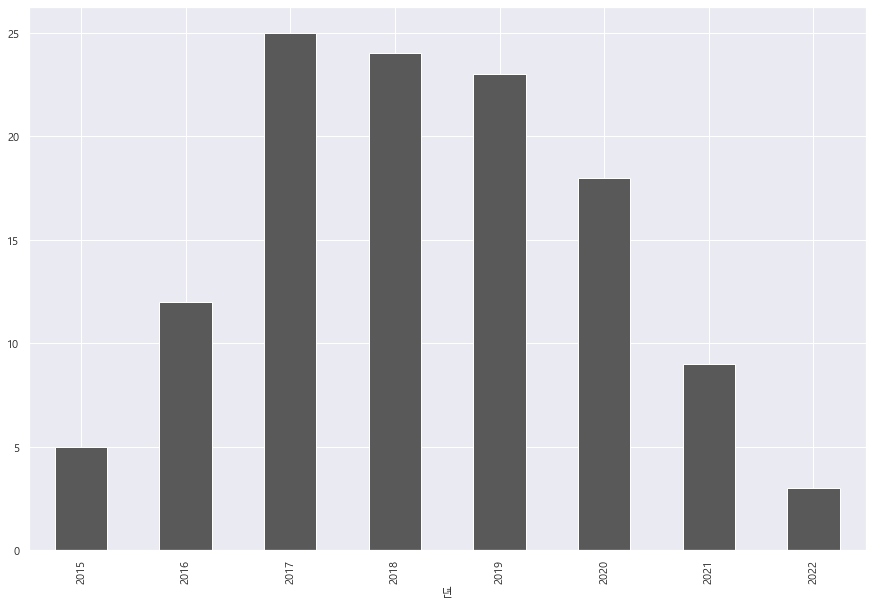

In [252]:
plt.figure(figsize=(15,10))
df_news.groupby(['년']).제목.count().plot.bar(color=('#595959'))

In [319]:
df_news[df_news.년 ==2017]

,제목,날짜,월,년
77,"`17년 전기차 계약완료, 대기자 접수",2017-11-16,11,2017
78,전기차 안전사고 예방? 안전교육에 답이 있네!,2017-11-16,11,2017
79,마감 임박 ! 전기차 구매 신청 서두르세요 !,2017-11-02,11,2017
80,전기차 공용 완속충전기 설치 절호 기회,2017-11-02,11,2017
81,"“행복 충전, 전기차 서포터즈”발대식 개최",2017-10-23,10,2017
82,"전기차 운행, 안전이 먼저!",2017-09-14,9,2017
83,추석은 ‘황금연휴’ 전기차 충전기는 ‘연중무휴’ 이상무,2017-09-14,9,2017
84,전기차 구매 신청 서두르세요!,2017-09-14,9,2017
85,"전기차 서포터즈,“우리동네”홍보대사로 나선다!",2017-08-29,8,2017
86,제주 전기차 충전소 안내’스마트폰으로 한 눈에 쏙...,2017-08-29,8,2017


In [189]:
df.reset_index(drop=True,inplace=True)

In [198]:
for i  in  range(55,75):
    print(f'{df.내용[i]}=\n{df.평가[i]}\n')

 숙소명   도라미휴양펜션 형태   관광휴양펜션 사업자등록번호   주소   제주 서귀포시 일주동로 신효동              제주 서귀포시 신효동  문의전화    평수   임대인원   객실수룸구조   기본시설평수임대인원기준최대객실수룸구조기본시설원룸평형원룸룸평형침실 거실화장실투룸평형침실 한실 거실화장실 예약가능기간  년중무휴 객실요금단기  보증금박일   보증금박일  보증금박일  보증금원룸만원없음만없음만없음만없음룸주중 만없음주말금토만없음만없음만없음만없음투룸주중 만없음주말금토만없음만없음만없음만없음 계약서 작성여부  계약서 없음 주변 관광지  쇠소깍 정방폭포 천지연폭포 새연교 황우지해변 올레길  코스휴애리 자연생활공원 치유의 숲길 한라산 둘레길 성판악 우리 숙소 소개   귀포시내 중심가에 위치한 저희 도라미펜션은 동으로는 쇠소깍차량분 표선민속촌차량분 성산일출봉차량 분 서로는 정방폭포차량분 서귀포 올레시장 천지연폭포 새연교차량분 외돌개차량분 북으로는 돈내코 유원지 상효원 식물원차량 분 휴애리 자연공원차량 분 한라산 등반로인 성판악차량 분등유명 관광지가 인근에 자리하고 있으며 차량 분이내에 마트 유명 맛집등이 있으며서귀포 축구 공원도보 분등이 있어 간단한 운동도 할수 있는 최적의 장소 입니다=
P

제주는 어딜가도 바다근처를 지날일이 많아서 언더코팅을 해야하나 고민중입니다요즘 나오는 차들은 기본적으로 코팅이 되어서 나온다고는 하는데 걱정이네요 제주시에 언더코팅 야매로 안하고 깔끔하게 잘해주는 업체 있나요=
N

딜러 매입가보다 좀 더 드리겠습니다연락주세요=
E

안녕하세요 믿을수 있는 중고차 찾으시나요후기로 증명하는 제주 등딜러 제주중고차특파원이 있습니다 제주 유일 중고차 유튜버로서 최선을 다해서 성실하게 일하고 있습니다르노삼성   전기차 연식년형식주행거리등급사고무사고연료전기변속기오토배터리보증기간년만이내회충전주행거리약압류저당체납 없음구입문의 찾으시는 매물이 아니 시더라도톡상담 하세요 원하시는 매물 찾아 드립니다 판매자 정보 소속상사  제주중고차매매상사 소속조합  제주

In [202]:
df.columns

Index(['제목', '유형', '조회수', '작성날짜', '월별', '카페명', '년별', '평가', '내용'], dtype='object')

In [203]:
df.카페명.unique()

array(['제사모', '느영나영', '전기차동호회', '네이버블로그', '전기차동호회(투플럭스)'], dtype=object)

In [206]:
df.유형.unique()[:10]

array(['제사모 중고장터', 'Q. 종합 질문방', '실시간 이야기', '제주여행 수다&질문', '중고자동차 매물',
       '■ 원룸/투룸/쓰리룸', '중고물건 구해요', '[벙개/동행/친구]', '행정사 김용우', '▦ 부동산 방 구해요'],
      dtype=object)

In [208]:
df.년별.unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2012, 2011,
       2010], dtype=int64)

In [254]:
df.년별.value_counts()

2021    177165
2020    110542
2019     56993
2022     43218
2018      3240
2017      1238
2016       454
2015       120
Name: 년별, dtype: int64

In [211]:
df.월별.unique()[:10]

array([2022.03, 2022.02, 2022.01, 2021.12, 2021.11, 2021.1 , 2021.09,
       2021.08, 2021.07, 2021.06])

In [212]:
df.조회수[:3]

0    130
1    161
2    119
Name: 조회수, dtype: object

In [214]:
df.평가[:3]

0    P
1    N
2    E
Name: 평가, dtype: object

In [220]:
df_keyword

,컨텐츠,날짜,좋아요,장소,태그
0,hyoseong_90신형 G90 첫출고 🥳사전계약하고도 오래걸렸지만기다려 주셔서 감...,2022-03-22,0,NaN,[]
1,ony._.chuu제주에서 바다 정말 많이가봣지만 개인적으로 가장 아름다운바다는 서...,2020-10-08,0,우도,"['#워니의✈️🌏', '#워니_jeju', '#제주', '#jeju', '#우도수정됨']"
2,rabbit1turtle.전기차 타보셨나요?.아마도 많은 분들이 제주에 관광오서셔 ...,2019-07-09,0,NaN,"['#제주전기차충전기', '#제주공항근처전기차충전', '#제주시전기차충전', '#전..."
3,seoah.hg코나 베이직케어🚘12월부터 예약하셨었는데 날씨가 좋지않아 이제야 케어...,2022-01-08,0,NaN,"['#디테일링k', '#코나ev', '#베이직케어', '#제주세차', '#제주손세차..."
4,hyeran5959나는 이제 #전기차라이프..3년 넘게 함께한지프차는 이제 새로운주...,2022-03-17,0,푸른섬 제주도,"['#전기차라이프..3년', '#전기트럭', '#전기차', '#제주전기차', '#전..."
...,...,...,...,...,...
569,mehyun_lee우리신랑 전기차서포터즈 위촉장?? 받는곳에 우리가족 출동~~~ 아...,2016-10-02,0,제주 현대미술관,"['#전기차서포터즈', '#위촉장받는남편', '#원희룡도지사님', '#도지사님과가족..."
570,auhiro51#BMWi3 #BMWi #전기자동차 #제주도전기차 #제주전기차 #i3...,2016-09-30,0,NaN,"['#BMWi3', '#BMWi', '#전기자동차', '#제주도전기차', '#제주전..."
571,jejur2나같이 동부 서부를 왔다갔다하는 제주여행에 전기자동차는 좀 아닌것 같다....,2016-09-05,0,표선농협,"['#제주여행', '#제주', '#제주전기차', '#전기차', '#bmwi3', '..."
572,sungeupland전기차를 이용하시는 고객님들을 위한 전기 충전 빵빵~안내!제주 ...,2016-08-29,0,성읍랜드,"['#제주도', '#제주도여행', '#전기차', '#제주전기차', '#전기차렌트카'..."


<AxesSubplot:xlabel='년별'>

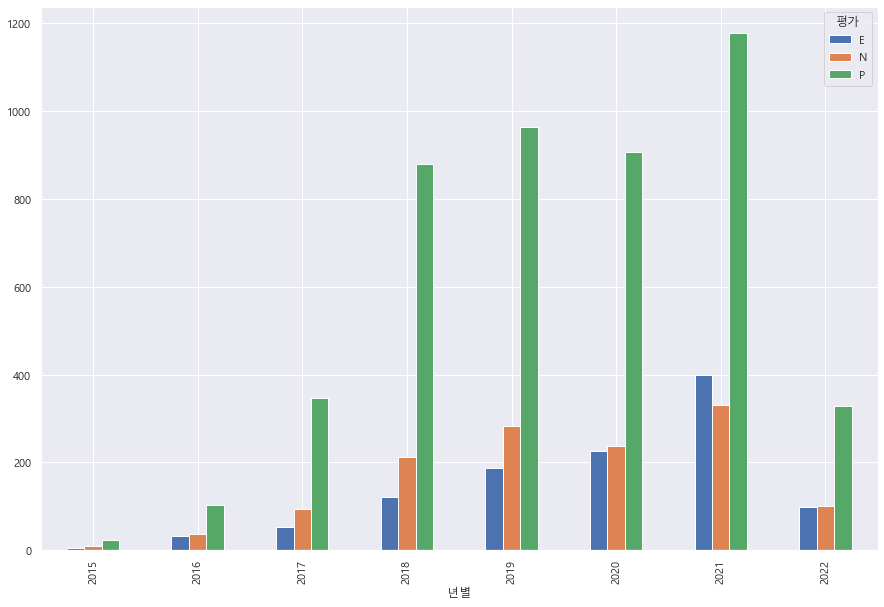

In [315]:
df_jeju[df_jeju.내용.str.contains('충전')].groupby([df_jeju.년별,df_jeju.평가]).내용.count().unstack().plot.bar(figsize=(15,10))

<AxesSubplot:xlabel='년별,평가'>

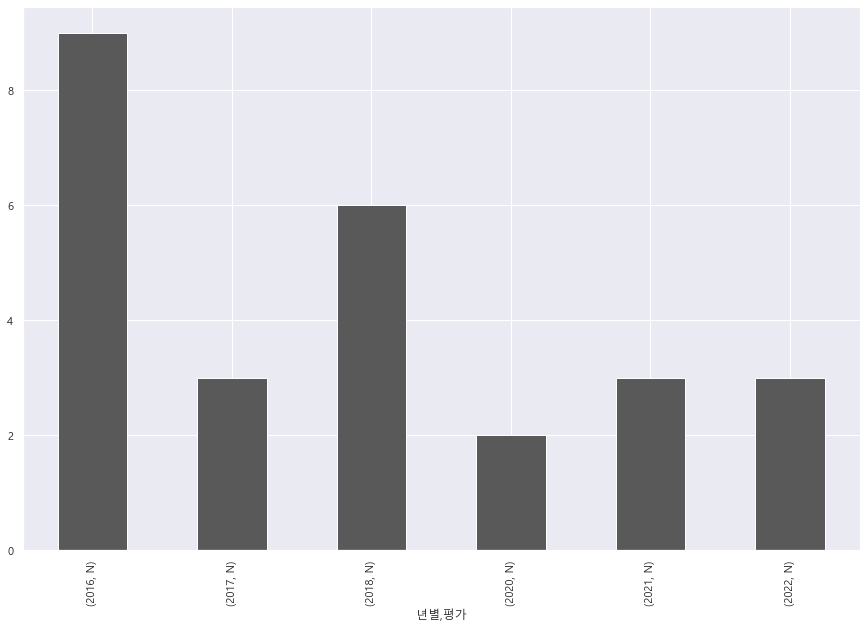

In [281]:
df[df.내용.str.contains('주행거리','주행 거리')].groupby([df.년별,df.평가[df.평가=='N']]).내용.count().plot.bar(color = '#595959',figsize=(15,10))

<AxesSubplot:xlabel='년별,평가'>

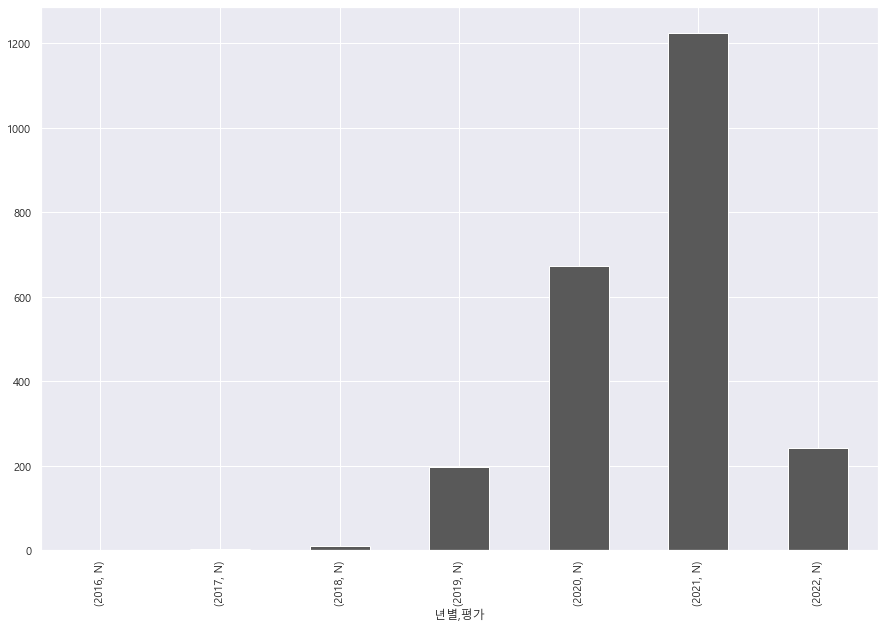

In [285]:
df[df.내용.str.contains('기아')].groupby([df.년별,df.평가[df.평가=='N']]).내용.count().plot.bar(color = '#595959',figsize=(15,10))

<AxesSubplot:xlabel='년별,평가'>

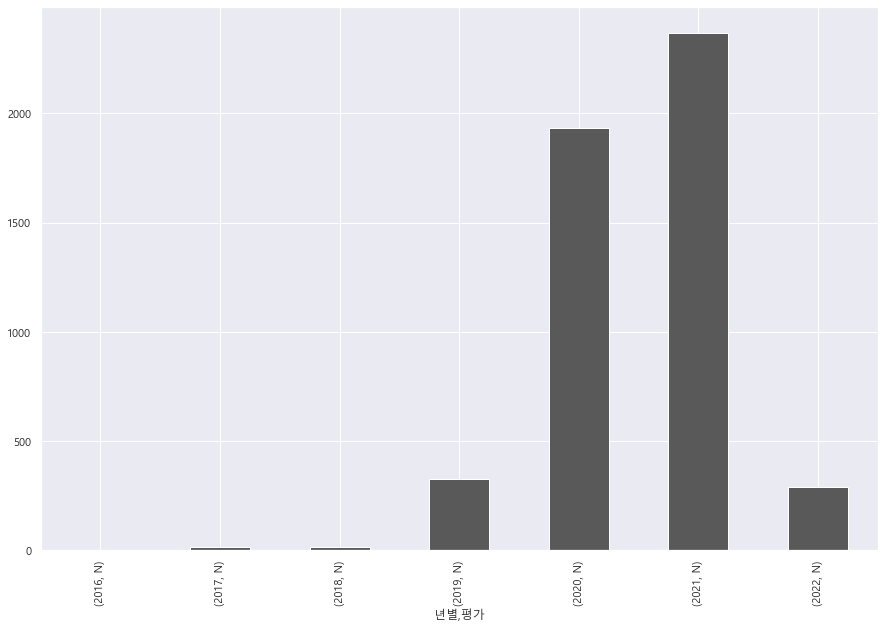

In [286]:
df[df.내용.str.contains('현대')].groupby([df.년별,df.평가[df.평가=='N']]).내용.count().plot.bar(color = '#595959',figsize=(15,10))

<AxesSubplot:xlabel='년별,평가'>

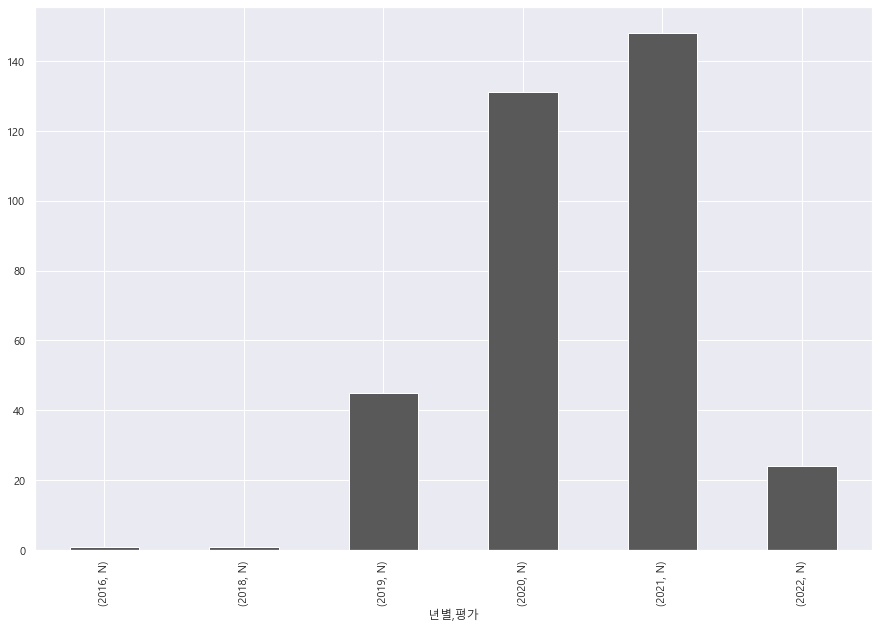

In [305]:
df[df.내용.str.contains('르노','르노삼성',)].groupby([df.년별,df.평가[df.평가=='N']]).내용.count().plot.bar(color = '#595959',figsize=(15,10))

<AxesSubplot:xlabel='년별,평가'>

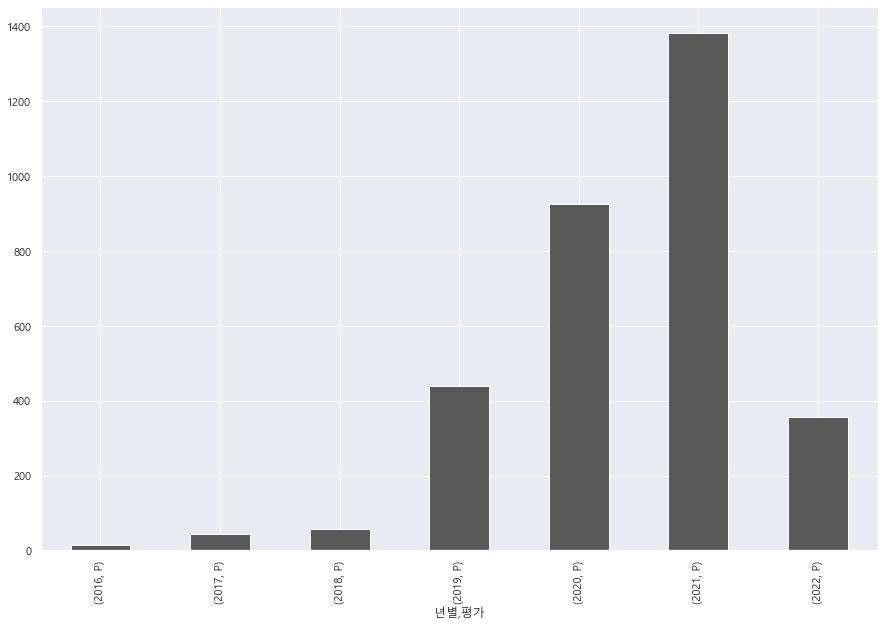

In [312]:
df[df.내용.str.contains('쉐')].groupby([df.년별,df.평가[df.평가=='P']]).내용.count().plot.bar(color = '#595959',figsize=(15,10))

In [5]:
mulitdf = pd.read_csv('전기차관심증가.csv')

In [375]:
mulitdf.reset_index(inplace=True)

In [6]:
mulitdf.columns

Index(['주', '전기차: (제주도)'], dtype='object')

In [7]:
mulitdf['주'] = mulitdf.주.apply(lambda x : x[:4])

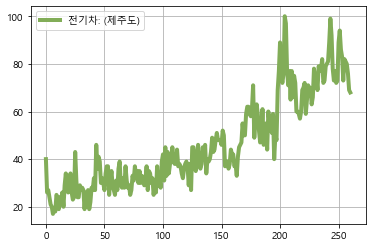

In [17]:
mulitdf.plot(color='#82AD58',linewidth=4,fontsize=10)
plt.grid()
plt.savefig('구글트렌드전기차 관심증가.png',dpi=350)

In [16]:
pwd

'G:\\내 드라이브\\제주_전기차\\data'

In [397]:
pd.DataFrame(mulitdf.주.value_counts())

,주
2018,52
2019,52
2020,52
2021,52
2017,42
2022,11


In [19]:
df['키워드'] = df.내용거른거.apply(lambda x : x if  in  )

,제목,내용,유형,조회수,작성날짜,월별,카페명,년별,평가,내용거른거
0,봉고3더블캡,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...
2,더 뉴 아이오닉 일렉트릭N 20년형 흰색7만 현대스마트센스 l추가 완전무사고/믿고사...,차량 정보 모델명 더 뉴 아이오닉 일렉트릭 전기차차량연식 년형년 월 등록차량...,중고자동차 매물,62,2022.03.16.,2022.03,제사모,2022,P,NaN
3,요번에 보니..,안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...,실시간 이야기,119,2022.03.15.,2022.03,제사모,2022,E,안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...
4,제주시 애월읍 해안도로 도보 1분 거리 애월 르시엘 아파트 할인 분양(회사 직영),매물제목 애월 르시엘 분양 거래유형 분양 소재지역 애월읍 신엄리 면적정...,■ 분양정보/신축매물,134,2022.03.15.,2022.03,제사모,2022,P,NaN


In [8]:
'안 녕하세요 메롱 '.__contains__('메롱요')

False

In [65]:
df.카페명.unique()

array(['제사모', '느영나영', '전기차동호회', '네이버블로그', '전기차동호회(투플럭스)'], dtype=object)

In [24]:
df_jeju =df [df['카페명']!='전기차동호회(투플럭스)']

In [9]:
df.dropna(inplace=True)

In [ ]:
# df['키워드'] = df.내용거른거.apply(lambda x: '충전' if x.__contains__('충전') else
#                                             '주행거리' if x.__contains__('거리') else
#                                             '자율주행' if x.__contains__ ('자율') else
#                                             '보조금' if x.__contains__('보조금') else
#                                             '배터리' if x.__contains__('배터리') else
#                                             '가격' if x.__contains__('가격') else
#                                             '인프라' if x.__contains__('인프라') else '미분류')

In [22]:
df['키워드'] = df.내용거른거.apply(lambda x: '인프라' if (x.__contains__('충전소') or x.__contains__('충전기')) else
                                            '주행거리' if (x.__contains__('거리') or x.__contains__('주행거리')) else
                                            '자율주행' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '배터리' if x.__contains__('배터리') else
                                            '가격' if x.__contains__('가격') else
                                            '인프라' if x.__contains__('인프라') else
                                           '수소차' if x.__contains__('수소') or x.__contains__('넥쏘')  else '미분류'
                          )

In [23]:
df['키워드'].value_counts()

미분류     261704
인프라      43760
가격       37530
주행거리     25730
배터리      12157
자율주행     10646
수소차       1443
Name: 키워드, dtype: int64

In [91]:
pwd

'G:\\내 드라이브\\제주_전기차\\data'

In [92]:
os.chdir('G:\내 드라이브\제주_전기차\김민우')

In [93]:
pwd

'G:\\내 드라이브\\제주_전기차\\김민우'

In [25]:
df['평가'] = df.평가.apply(lambda x : '긍정' if x == 'P' else
                       '부정' if x =='N' else
                       '중립')

In [26]:
df_jeju['평가'] = df_jeju.평가.apply(lambda x : '긍정' if x == 'P' else
                       '부정' if x =='N' else
                       '중립')

/tmp/ipykernel_144807/1366927477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeju['평가'] = df_jeju.평가.apply(lambda x : '긍정' if x == 'P' else


In [ ]:
os.chdir('.')

In [28]:
cd ~/WorkSpace/GoogleDrive/제주_전기차/data/

/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data


In [29]:
pwd

'/home/miwoos/WorkSpace/GoogleDrive/제주_전기차/data'

/tmp/ipykernel_144807/2237628685.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.카페명 =='전기차동호회(투플럭스)'][df['키워드'] != '미분류'].groupby([df.키워드,df.평가]).키워드.count().unstack().plot.bar(stacked=True)


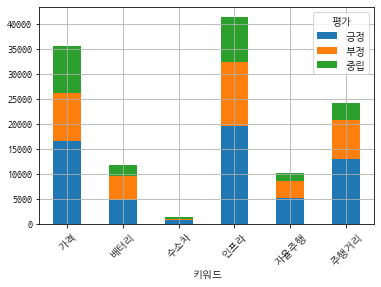

In [36]:
df[df.카페명 =='전기차동호회(투플럭스)'][df['키워드'] != '미분류'].groupby([df.키워드,df.평가]).키워드.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('키워드별긍부정.png',dpi=350)

In [167]:
df_jeju['키워드'] = df_jeju.내용거른거.apply(lambda x: '인프라' if (x.__contains__('충전소') or x.__contains__('충전기')) else
                                            '주행거리' if (x.__contains__('거리') or x.__contains__('주행거리')) else
                                            '자율주행' if x.__contains__ ('주행') else
                                            '가격' if x.__contains__('보조금') else
                                            '배터리' if x.__contains__('배터리') else
                                            '가격' if x.__contains__('가격') else
                                            '인프라' if x.__contains__('인프라') else '미분류')

C:\Users\alsdn\AppData\Local\Temp/ipykernel_1224/3099755654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeju['키워드'] = df_jeju.내용거른거.apply(lambda x: '인프라' if (x.__contains__('충전소') or x.__contains__('충전기')) else


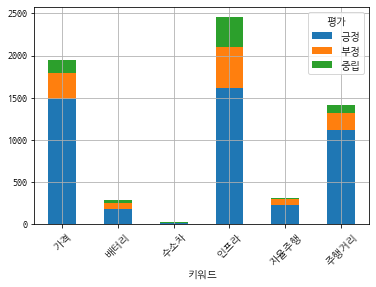

In [58]:
df_jeju[df_jeju['키워드'] != '미분류'].groupby([df_jeju.키워드,df_jeju.평가]).키워드.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('제주키워드별긍부정.png',dpi=350)

In [103]:
df

,제목,내용,유형,조회수,작성날짜,월별,카페명,년별,평가,내용거른거,키워드,제조사
0,봉고3더블캡,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,제사모 중고장터,130,2022.03.16.,2022.03,제사모,2022,P,보다 투명하고 빠른 거래를 위하여 아래의 글 양식을 준수하여 주세요 거래 지역...,가격,미분류
1,렌트카 알아보고 있는데 lpg 차량이 저렴한 이유가 뭘까요?,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,Q. 종합 질문방,161,2022.03.16.,2022.03,제사모,2022,N,육지에서 이번주 토욜부터 제주 한달살이 시작하면서 렌트카 알아보고 있어요 육지에선 ...,가격,미분류
3,요번에 보니..,안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...,실시간 이야기,119,2022.03.15.,2022.03,제사모,2022,E,안에렌터카 무진장 많이 다니던데임산부 노약자 상관없이넘쳐나던디거기다우도내에전기차 렌...,미분류,미분류
5,여행 고수님들 추천좀 해주세요,월일일 딸명과 엄마까지 총 인 제주여행을 계획중입니다비행기 예약은 끝났고 렌트카를 ...,제주여행 수다&질문,60,2022.03.14.,2022.03,제사모,2022,P,월일일 딸명과 엄마까지 총 인 제주여행을 계획중입니다비행기 예약은 끝났고 렌트카를 ...,충전,미분류
6,전기차 신차급,차량 정보 차량번호 차량 번호 참고 연식 주행거리 만킬로 연료 전기 변...,중고자동차 매물,354,2022.03.10.,2022.03,제사모,2022,E,차량 정보 차량번호 차량 번호 참고 연식 주행거리 만킬로 연료 전기 변...,충전,미분류
...,...,...,...,...,...,...,...,...,...,...,...,...
414153,취소차 잡아주실 카마스터님 계실까요?,취소 차 잡다 카 마스터 님 계시다 요 계시다 요 아이오 닉 두다 좋다 지역 울릉 이다,투플럭스,조회수없음,2022.03.03.,2022.03,전기차동호회(투플럭스),2022,P,취소 차 잡다 카 마스터 님 계시다 요 계시다 요 아이오 닉 두다 좋다 지역 울릉 이다,미분류,현대
414154,C40 대기순번 문의,대기 순번 문의 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다 네 ...,투플럭스,조회수없음,2022.03.02.,2022.03,전기차동호회(투플럭스),2022,E,대기 순번 문의 관련 되다 주제 대해 미리 카페 내 검색 하다 보다 네 아니다 네 ...,미분류,미분류
414156,니로 ev 회생제동 질문,니 로 회생제동 질문 안녕하다 니 로 중고 로 타고 있다 네비업뎃 하고 나서다 부터...,투플럭스,조회수없음,2022.03.02.,2022.03,전기차동호회(투플럭스),2022,E,니 로 회생제동 질문 안녕하다 니 로 중고 로 타고 있다 네비업뎃 하고 나서다 부터...,미분류,미분류
414157,가입인사 드립니다,가입 인사 드리다 자기 소개 안녕하다 기다리다 있다 지역 고양시 한글 별명 뜻 이름...,투플럭스,조회수없음,2022.03.06.,2022.03,전기차동호회(투플럭스),2022,P,가입 인사 드리다 자기 소개 안녕하다 기다리다 있다 지역 고양시 한글 별명 뜻 이름...,미분류,미분류


In [43]:
df['제조사'] = df.내용거른거.apply(lambda x: '현대' if x.__contains__('현대') or x.__contains__('아이오') or x.__contains__('코') or x.__contains__('닉')or x.__contains__('넥쏘') else
                                            '테슬라' if x.__contains__('테슬라') or  x.__contains__('모델') or x.__contains__('모') or  x.__contains__('델') else
                                            '기아' if x.__contains__ ('기아') or  x.__contains__ ('니') or  x.__contains__ ('로') else
                                            '현기' if x.__contains__('현기') else
                                            '쉐보래' if x.__contains__('쉐') or x.__contains__('볼') or x.__contains__('볼트') else
                                            '르노삼성' if x.__contains__('르노') else '미분류')

In [44]:
df['제조사'].value_counts()

현대      111849
기아       99958
미분류      98330
테슬라      75708
쉐보래       6713
르노삼성       284
현기         128
Name: 제조사, dtype: int64

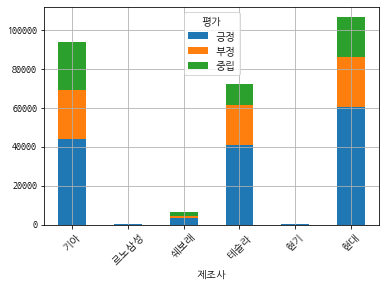

In [ ]:
df[df.카페명 =='전기차동호회(투플럭스)'].groupby([df.제조사[df.제조사!='미분류'],df.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('제조사별긍부정.png',dpi=350)

In [51]:
df_jeju['제조사'] = df_jeju.내용거른거.apply(lambda x: '현대' if x.__contains__('현대') or x.__contains__('아이오') or x.__contains__('코') or x.__contains__('닉')or x.__contains__('넥쏘') else
                                            '테슬라' if x.__contains__('테슬라') or  x.__contains__('모델') or x.__contains__('모') or  x.__contains__('델') else
                                            '기아' if x.__contains__ ('기아') or  x.__contains__ ('니') or  x.__contains__ ('로') else
                                            '현대' if x.__contains__('현기') else
                                            'others' if x.__contains__('쉐') or x.__contains__('볼') or x.__contains__('볼트') else
                                            'others' if x.__contains__('르노') else '미분류')

/tmp/ipykernel_144807/377090973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jeju['제조사'] = df_jeju.내용거른거.apply(lambda x: '현대' if x.__contains__('현대') or x.__contains__('아이오') or x.__contains__('코') or x.__contains__('닉')or x.__contains__('넥쏘') else


In [52]:
df_jeju.제조사.value_counts()

기아        5977
현대        5216
미분류       3427
테슬라       3163
others      99
Name: 제조사, dtype: int64

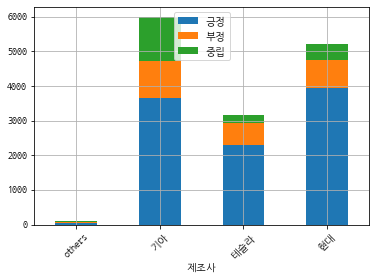

In [53]:
df_jeju.groupby([df_jeju.제조사[df_jeju.제조사!='미분류'],df_jeju.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.legend(loc = 'upper center')
plt.xticks(rotation=45)
plt.grid()
plt.savefig('제주제조사별긍부정.png',dpi=350)

In [54]:
df['제조사'].value_counts()

현대      111849
기아       99958
미분류      98330
테슬라      75708
쉐보래       6713
르노삼성       284
현기         128
Name: 제조사, dtype: int64

In [55]:
df.columns

Index(['제목', '내용', '유형', '조회수', '작성날짜', '월별', '카페명', '년별', '평가', '내용거른거',
       '키워드', '제조사'],
      dtype='object')

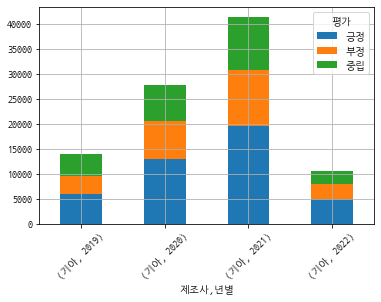

In [61]:
df[df.카페명 =='전기차동호회(투플럭스)'].groupby([df.제조사[df.제조사=='기아'],df.년별,df.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('기아년도별.png',dpi=350)

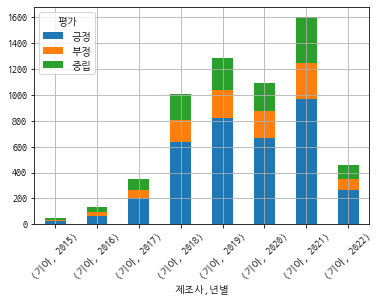

In [60]:
df_jeju.groupby([df_jeju.제조사[df_jeju.제조사=='기아'],df_jeju.년별,df_jeju.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('기아년도별(제주).png',dpi=350)

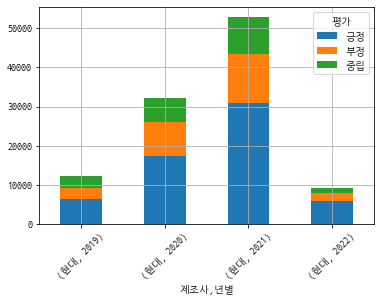

In [66]:
df[df.카페명 =='전기차동호회(투플럭스)'].groupby([df.제조사[df.제조사=='현대'],df.년별,df.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('현대년도별.png',dpi=350)

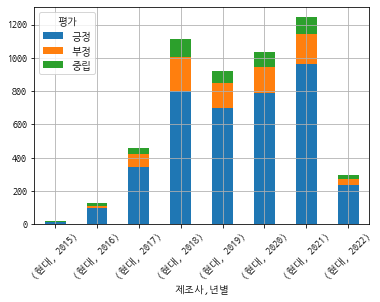

In [62]:
df_jeju.groupby([df_jeju.제조사[df_jeju.제조사=='현대'],df_jeju.년별,df_jeju.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('현대년도별(제주).png',dpi=350)

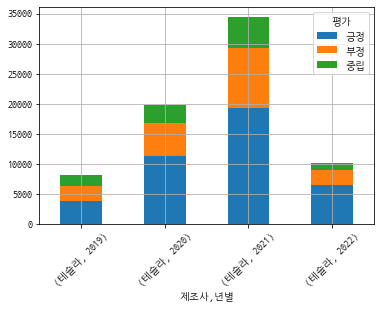

In [65]:
df[df.카페명 =='전기차동호회(투플럭스)'].groupby([df.제조사[df.제조사=='테슬라'],df.년별,df.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('테슬라년도별.png',dpi=350)

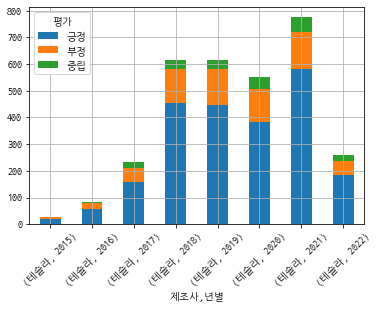

In [67]:
df_jeju.groupby([df_jeju.제조사[df_jeju.제조사=='테슬라'],df_jeju.년별,df_jeju.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('테슬라년도별(제주).png',dpi=350)

In [68]:
df.키워드.unique()[0]

'가격'

In [ ]:
df[df.카페명 =='전기차동호회(투플럭스)'].groupby([df.제조사[df.제조사=='현대'],df.년별,df.평가]).제조사.count().unstack().plot.bar(stacked=True)
plt.xticks(rotation=45)
plt.grid()
plt.savefig('제조사별긍부정.png',dpi=350)